In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Install Omics Integrator**

In [4]:
! pip install OmicsIntegrator --no-deps
! pip install pcst_fast axial
! pip install --upgrade --force-reinstall --no-deps python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached python_louvain-0.16-py3-none-any.whl
  Attempting uninstall: python-louvain
    Found existing installation: python-louvain 0.16
    Uninstalling python-louvain-0.16:
      Successfully uninstalled python-louvain-0.16


# **Import Libraries**

In [5]:
import OmicsIntegrator as oi
import pandas as pd
import numpy as np
import networkx as nx

# **Prepare Interactome and Prize Files**

In [6]:
interactome_file= "/content/gdrive/MyDrive/Wintercamp/OmicsIntegrator/Human/inputs/HIPPIE-current.mitab.txt"
prize_file= "/content/gdrive/MyDrive/Wintercamp/OmicsIntegrator/Human/inputs/Prizes.txt"

interactome= pd.read_csv(interactome_file, sep="\t")
interactome = interactome[['Gene Name Interactor A', 'Gene Name Interactor B', 'Confidence Value']]
interactome = interactome.rename(columns={'Gene Name Interactor A': 'protein1', 'Gene Name Interactor B': 'protein2'})
interactome['cost'] = 1.5 - interactome['Confidence Value']
interactome.dropna(inplace=True)
del interactome['Confidence Value']

interactome.to_csv('interactome.txt', sep='\t', index= False)
interactome_file = 'interactome.txt'

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
params = {
    "noise": 0.1, 
    "dummy_mode": "terminals", 
    "exclude_terminals": False, 
    "seed": 1
}

graph=oi.Graph(interactome_file,params)
graph.prepare_prizes(prize_file)

09:33:35 - OI2: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
INFO:OmicsIntegrator.graph:Duplicated gene symbols in the prize file (we'll keep the max prize):
09:33:35 - OI2: INFO - []
INFO:OmicsIntegrator.graph:[]
09:33:35 - OI2: INFO - Members of the prize file not present in the interactome:
INFO:OmicsIntegrator.graph:Members of the prize file not present in the interactome:
09:33:35 - OI2: INFO - ['CFHR1', 'H2AC20', 'H2BC21', 'IGHV1-24', 'IGHV2-26', 'IGHV5-51', 'IGLV9-49', 'KRTDAP', 'SAA1', 'SAA2']
INFO:OmicsIntegrator.graph:['CFHR1', 'H2AC20', 'H2BC21', 'IGHV1-24', 'IGHV2-26', 'IGHV5-51', 'IGLV9-49', 'KRTDAP', 'SAA1', 'SAA2']


# **Hyperparameter Tuning with Grid Search**

In [1]:
! pip install --upgrade --force-reinstall --no-deps python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached python_louvain-0.16-py3-none-any.whl
  Attempting uninstall: python-louvain
    Found existing installation: python-louvain 0.16
    Uninstalling python-louvain-0.16:
      Successfully uninstalled python-louvain-0.16


In [8]:
Ws = list(np.arange(2,6,2))
Bs = list(np.arange(2,7,2))
Gs = list(np.arange(2,7,2))

# Or:

#Ws = [2,3]
#Bs = [4,5,6]
#Gs = [3,4,5]

params = {
    "noise": 0.1, 
    "dummy_mode": "terminals", 
    "exclude_terminals": False, 
    "seed": 1
}

results = graph.grid_search(prize_file, Ws, Bs, Gs)
membership_df = oi.summarize_grid_search(results, "membership")

prize = pd.read_csv(prize_file,sep="\t")
initial_nodes=list(prize.name)          
results_with_terminals = membership_df[membership_df.index.isin(initial_nodes)]
Initial_node_covers = results_with_terminals.sum().sort_values(ascending=False).to_frame(name="Covering_nodes")

out = set(Initial_node_covers[Initial_node_covers["Covering_nodes"]==max(Initial_node_covers["Covering_nodes"])].index)

Initial_node_covers.sort_index(axis=0, inplace=True)
membership_df.sort_index(axis=1, inplace=True)
Total_node = membership_df.sum().to_frame(name="Total_nodes")

membership_df.loc['Covering nodes']=(Initial_node_covers['Covering_nodes'])
membership_df.loc['Total_nodes']=(Total_node['Total_nodes'])
membership_df.to_csv('membership_df_with_node_numbers.csv')

09:33:51 - OI2: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
INFO:OmicsIntegrator.graph:Duplicated gene symbols in the prize file (we'll keep the max prize):
09:33:51 - OI2: INFO - []
INFO:OmicsIntegrator.graph:[]
09:33:51 - OI2: INFO - Members of the prize file not present in the interactome:
INFO:OmicsIntegrator.graph:Members of the prize file not present in the interactome:
09:33:51 - OI2: INFO - ['CFHR1', 'H2AC20', 'H2BC21', 'IGHV1-24', 'IGHV2-26', 'IGHV5-51', 'IGLV9-49', 'KRTDAP', 'SAA1', 'SAA2']
INFO:OmicsIntegrator.graph:['CFHR1', 'H2AC20', 'H2BC21', 'IGHV1-24', 'IGHV2-26', 'IGHV5-51', 'IGLV9-49', 'KRTDAP', 'SAA1', 'SAA2']
09:34:03 - OI2: INFO - Single PCSF run for W_2.00_B_2.00_G_2.00
INFO:OmicsIntegrator.graph:Single PCSF run for W_2.00_B_2.00_G_2.00
09:34:07 - OI2: INFO - Single PCSF run for W_2.00_B_4.00_G_2.00
INFO:OmicsIntegrator.graph:Single PCSF run for W_2.00_B_4.00_G_2.00
09:34:16 - OI2: INFO - Single PCSF run for W_2.00_B_2.00_G_4.00
IN

Select Parameters and 

In [9]:
#Selected Parameters
w=2
b=2
g=2

In [10]:
graph = oi.Graph(interactome_file, {'w':w, 'b':b, 'g':g,})
graph.prepare_prizes(prize_file)
vertex_indices, edge_indices = graph.pcsf()

print(len(vertex_indices))

forest, augmented_forest = graph.output_forest_as_networkx(vertex_indices, edge_indices)
print(graph.pcsf_objective_value(augmented_forest))

# removing self loops
augmented_forest.remove_edges_from(nx.selfloop_edges(augmented_forest))
forest.remove_edges_from(nx.selfloop_edges(forest))

09:36:50 - OI2: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
INFO:OmicsIntegrator.graph:Duplicated gene symbols in the prize file (we'll keep the max prize):
09:36:50 - OI2: INFO - []
INFO:OmicsIntegrator.graph:[]
09:36:51 - OI2: INFO - Members of the prize file not present in the interactome:
INFO:OmicsIntegrator.graph:Members of the prize file not present in the interactome:
09:36:51 - OI2: INFO - ['CFHR1', 'H2AC20', 'H2BC21', 'IGHV1-24', 'IGHV2-26', 'IGHV5-51', 'IGLV9-49', 'KRTDAP', 'SAA1', 'SAA2']
INFO:OmicsIntegrator.graph:['CFHR1', 'H2AC20', 'H2BC21', 'IGHV1-24', 'IGHV2-26', 'IGHV5-51', 'IGLV9-49', 'KRTDAP', 'SAA1', 'SAA2']


121
548.3604752130003


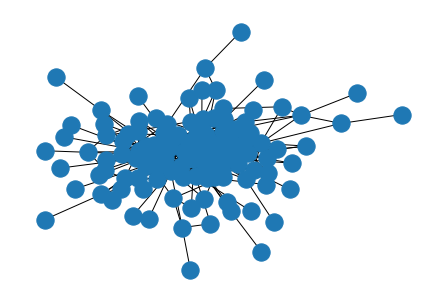

In [11]:
nx.draw_spring(augmented_forest)

In [12]:
oi.get_networkx_graph_as_dataframe_of_nodes(augmented_forest).head()

,prize,up_or_downregulated,terminal,type,degree,betweenness,louvain_clusters,location,general_process,specific_process,general_function,specific_function
APCS,1.185718,1.0,True,protein,34,0.005125,0,extracellular,biological regulation,regulation of biological process,binding,protein binding
CFD,1.180074,1.0,True,protein,14,0.002011,1,extracellular,immune system process,immune effector process,catalytic,hydrolase
C6,0.550028,1.0,True,protein,16,0.009486,2,plasma_membrane,biological regulation,regulation of biological process,binding,protein binding
APOA4,0.647245,-1.0,True,protein,23,0.000407,3,extracellular,biological regulation,regulation of biological process,binding,protein binding
IGKV3-20,1.316362,1.0,True,protein,4,0.000000,1,NaN,immune system process,immune effector process,catalytic,hydrolase


In [13]:
oi.output_networkx_graph_as_interactive_html(augmented_forest)

PosixPath('/content/graph.html')

In [ ]:
oi.get_networkx_graph_as_dataframe_of_edges(augmented_forest).to_csv('edges.txt', sep='\t', header=True, index=False)
oi.get_networkx_graph_as_dataframe_of_nodes(augmented_forest).to_csv('nodes.txt', sep='\t', header=True, index=True)

oi.output_networkx_graph_as_graphml_for_cytoscape(augmented_forest, output_dir='', filename='results.graphml')
oi.output_networkx_graph_as_interactive_html(augmented_forest, output_dir='',filename="pcsf.html")